## Writeup / Read P5 Vehicle Detection


**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

[//]: # (Image References)
[image1]: ./output_images/test_1261.png
[image2]: ./output_images/window_img_1261.jpg
[image3]: ./output_images/heat_img_1261.jpg
[image4]: ./output_images/bb_img_1261.jpg
[video1]: ./videos/test_video_result.mp4
[video2]: ./videos/project_video_result.mp4

## [Rubric](https://review.udacity.com/#!/rubrics/513/view) Points

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the file `feature_helper.py`).  

It contains the functions:

```
def get_hog_features(img, 
                     orient, 
                     pix_per_cell, 
                     cell_per_block, 
                     vis=False, 
                     feature_vec=True)
```
to return HOG features and visualization for a single image.

``` 
def bin_spatial(img, size=(32, 32))
```
to compute binned color features  for a single image

```
def color_hist(img, nbins=32, bins_range=(0, 256))
```
to compute color histogram features for a single image

```
def extract_features(imgs, 
                     color_space='RGB', 
                     spatial_size=(64, 64),
                     hist_bins=32, orient=9, 
                     pix_per_cell=8, 
                     cell_per_block=2, 
                     hog_channel=0,
                     spatial_feat=True, 
                     hist_feat=True, 
                     hog_feat=True)
```
to extract all features from a list of images

```
def single_img_features(img, 
                        color_space='RGB', 
                        spatial_size=(64, 64),
                        hist_bins=32, 
                        orient=9, 
                        pix_per_cell=8, 
                        cell_per_block=2, 
                        hog_channel=0,
                        spatial_feat=True, 
                        hist_feat=True, 
                        hog_feat=True)
```
to extract features from a single image or window

To check different parameters and color space, an seperate ipython notebook is used.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Define a function to compute color histogram features  
def color_hist_single_ch(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    ch_hist = np.histogram(img, bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = ch_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    # hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return ch_hist, bin_centers

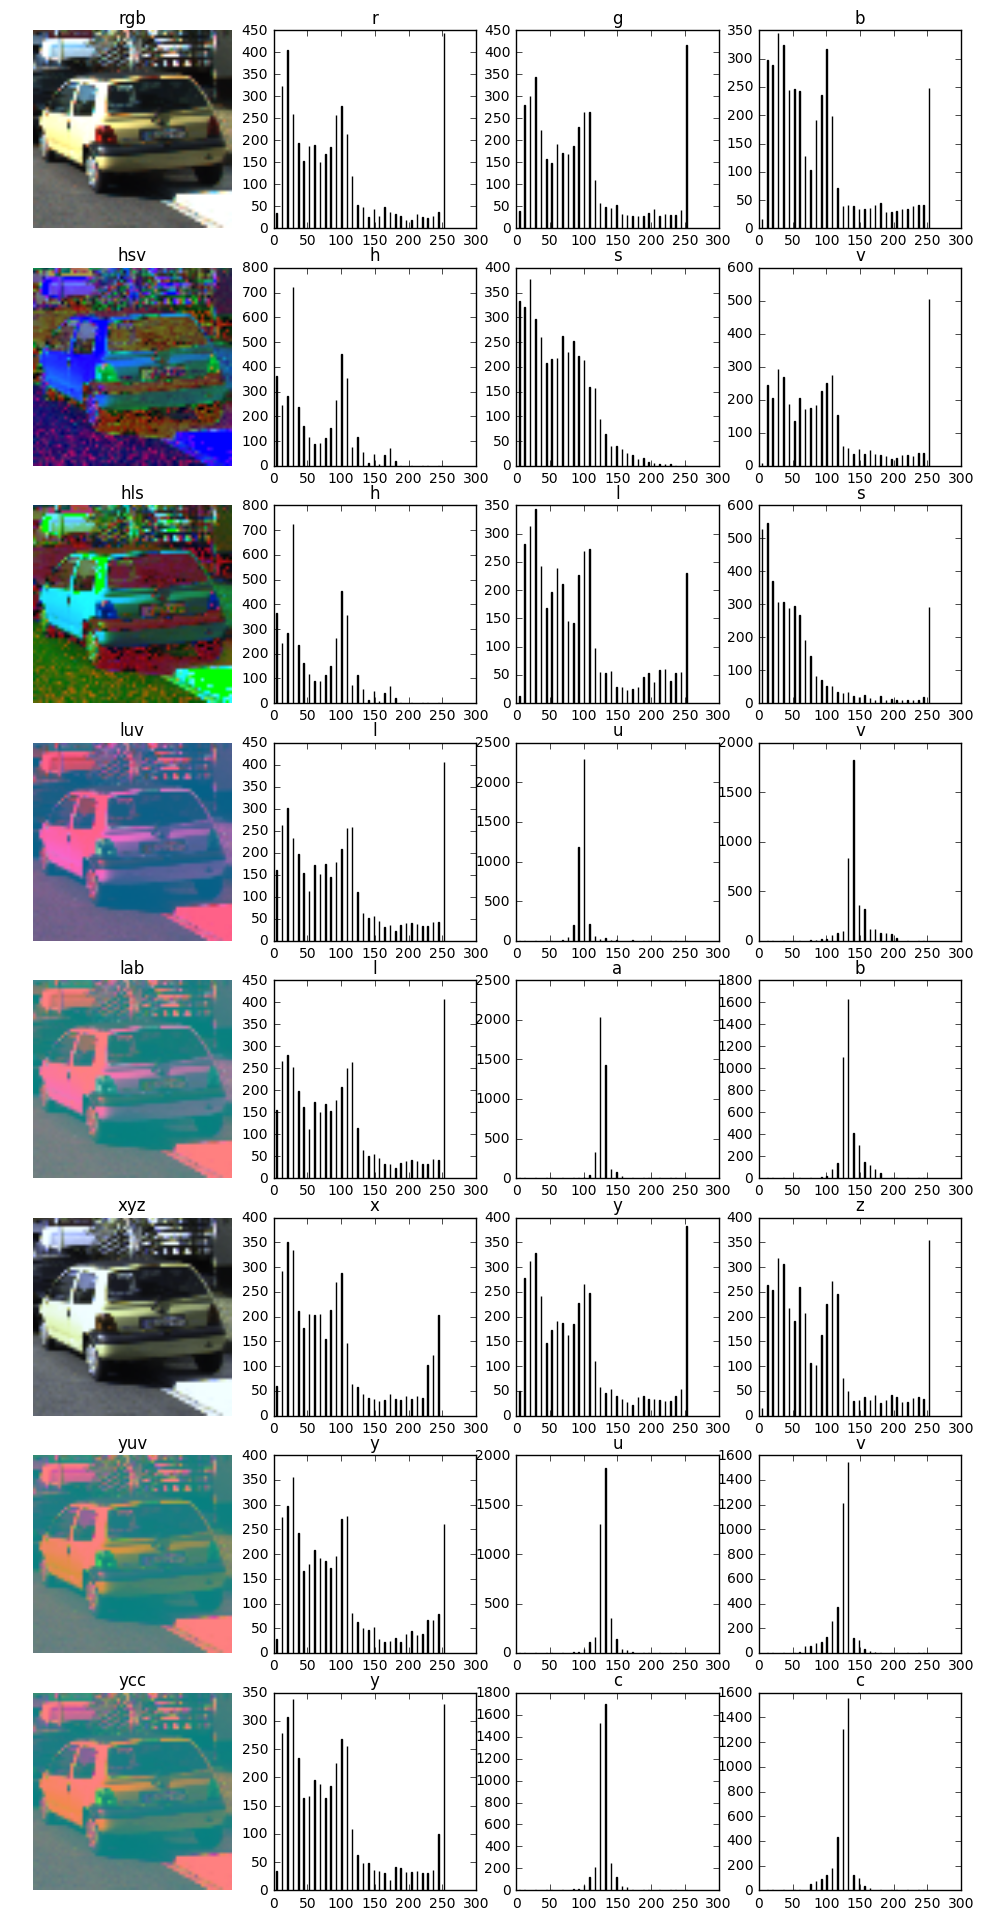

In [6]:
#car image (25, 31, 53)
#PNG image
#image = mpimg.imread('test_images/25.png')*255
image = cv2.imread('test_images/25.png') # in BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#JPG image

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
luv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
xyz = cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)
yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
ycc = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

color_spaces_names = ['rgb', 'hsv', 'hls', 'luv', 'lab', 'xyz', 'yuv', 'ycc']
color_spaces = [image, hsv, hls, luv, lab, xyz, yuv, ycc]

rows = len(color_spaces)

fig, axis = plt.subplots(rows, 4, figsize=(12, 3*rows))
for row, colorspace in enumerate(color_spaces):
    axis[row, 0].set_title(color_spaces_names[row])
    axis[row, 0].imshow(colorspace)
    axis[row, 0].axis('off')
    for ch in range(3):
        ch_hist, bincen = color_hist_single_ch(colorspace[:,:,ch], nbins=32, bins_range=(0, 256))
        axis[row, ch + 1].set_title(color_spaces_names[row][ch])
        axis[row, ch + 1].bar(bincen, ch_hist[0])

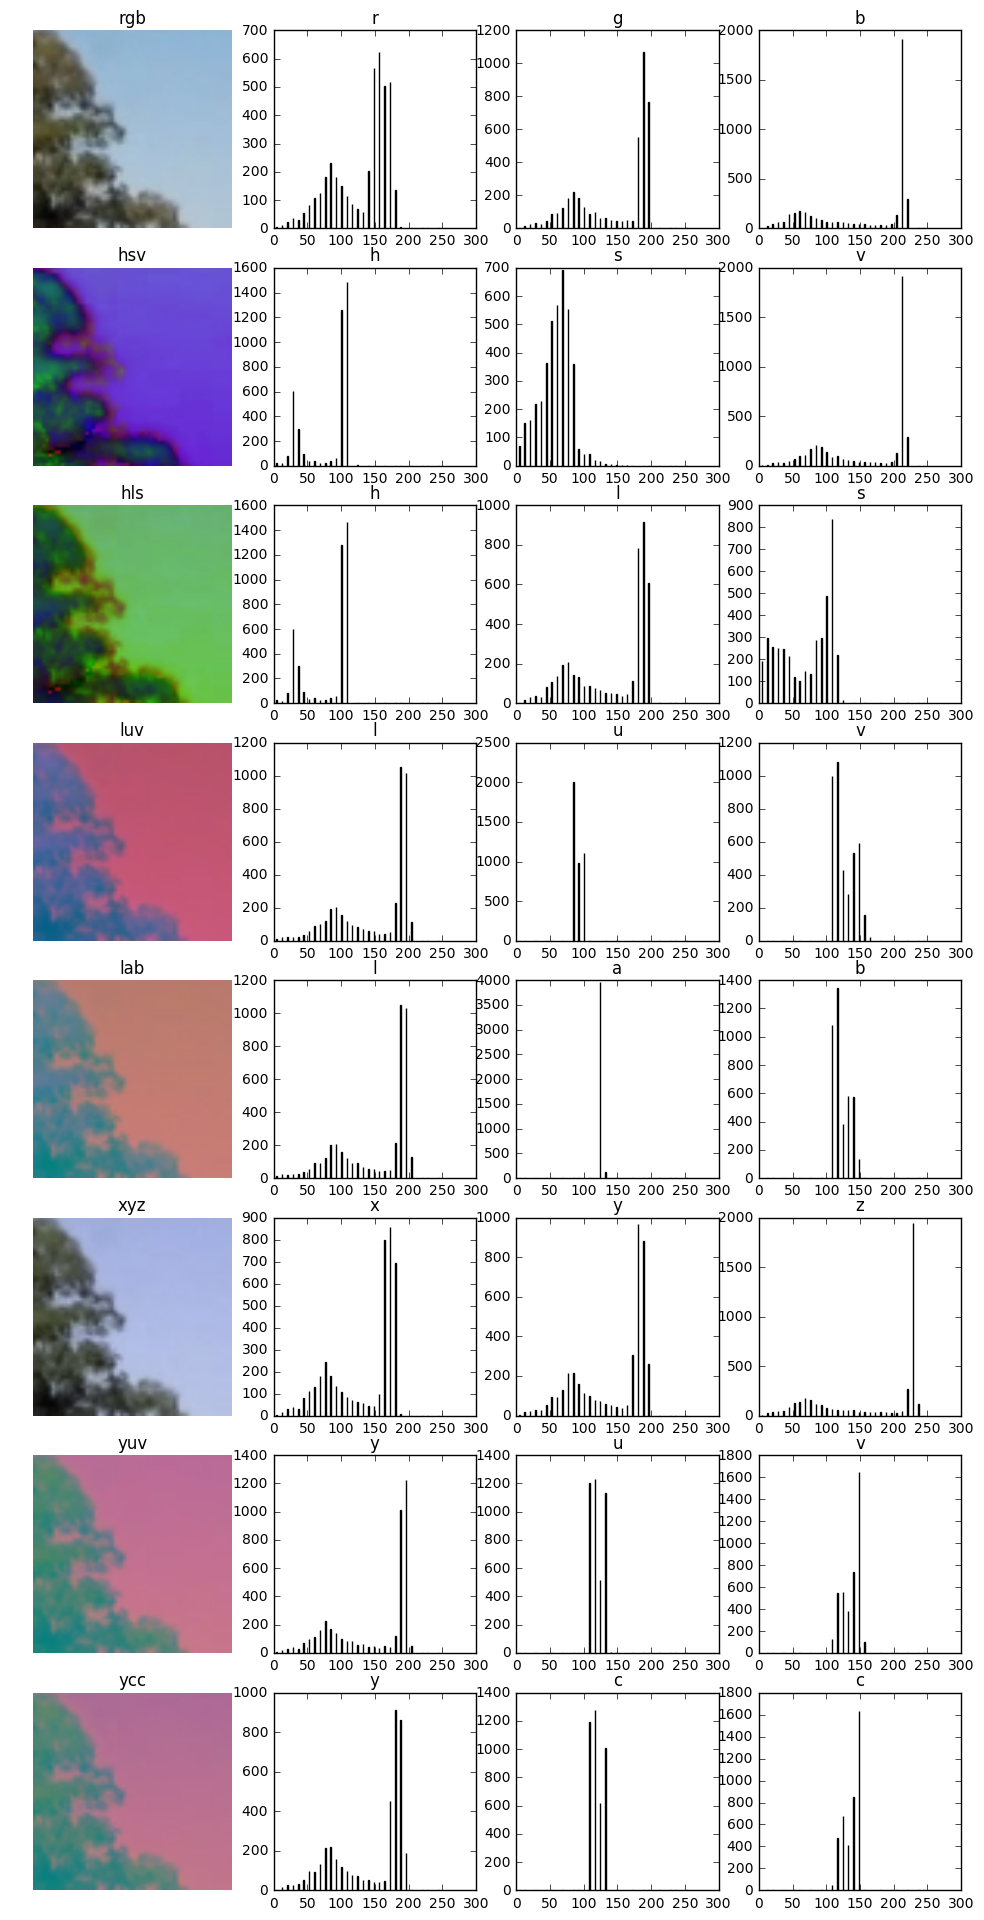

In [7]:
#non-car image (2 ,3, 8 )
#image = mpimg.imread('test_images/2.jpg')
image = cv2.imread('test_images/2.png') # in BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
luv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
xyz = cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)
yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
ycc = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

color_spaces_names = ['rgb', 'hsv', 'hls', 'luv', 'lab', 'xyz', 'yuv', 'ycc']
color_spaces = [image, hsv, hls, luv, lab, xyz, yuv, ycc]

rows = len(color_spaces)

fig, axis = plt.subplots(rows, 4, figsize=(12, 3*rows))
for row, colorspace in enumerate(color_spaces):
    axis[row, 0].set_title(color_spaces_names[row])
    axis[row, 0].imshow(colorspace)
    axis[row, 0].axis('off')

    for ch in range(3):
        ch_hist, bincen = color_hist_single_ch(colorspace[:,:,ch], nbins=32, bins_range=(0, 256))
        axis[row, ch + 1].set_title(color_spaces_names[row][ch])
        axis[row, ch + 1].bar(bincen, ch_hist[0])
        

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels, axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

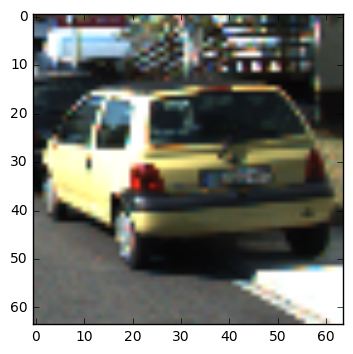

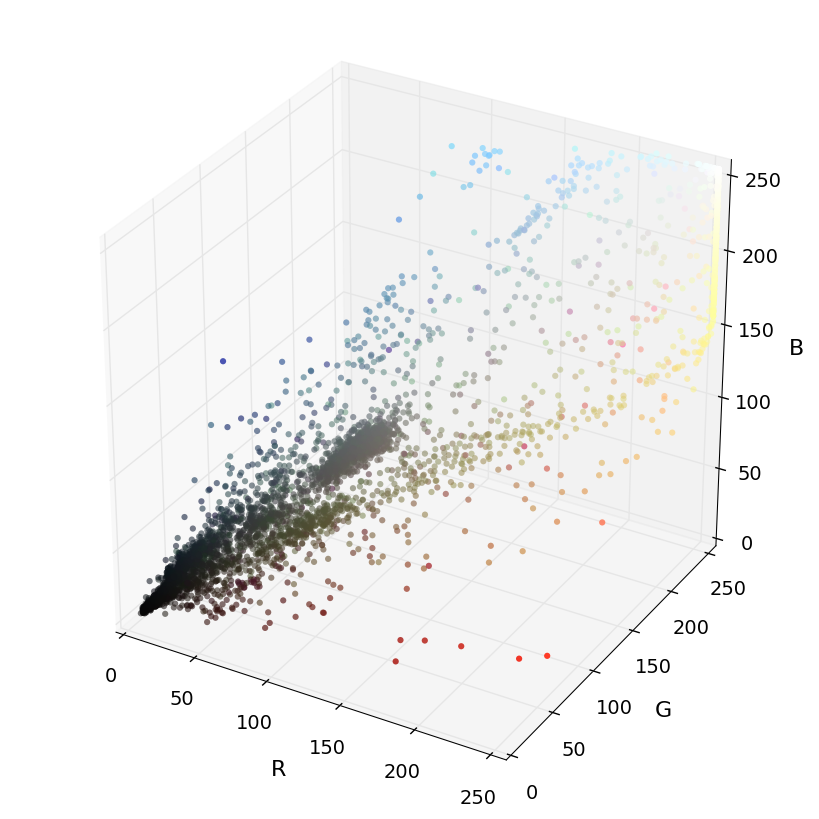

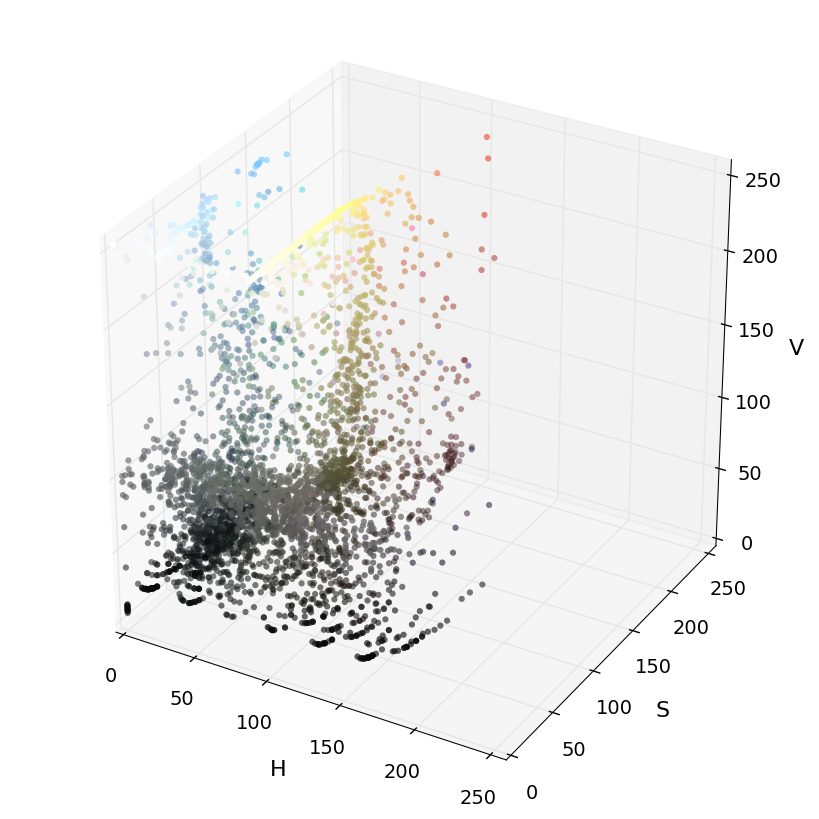

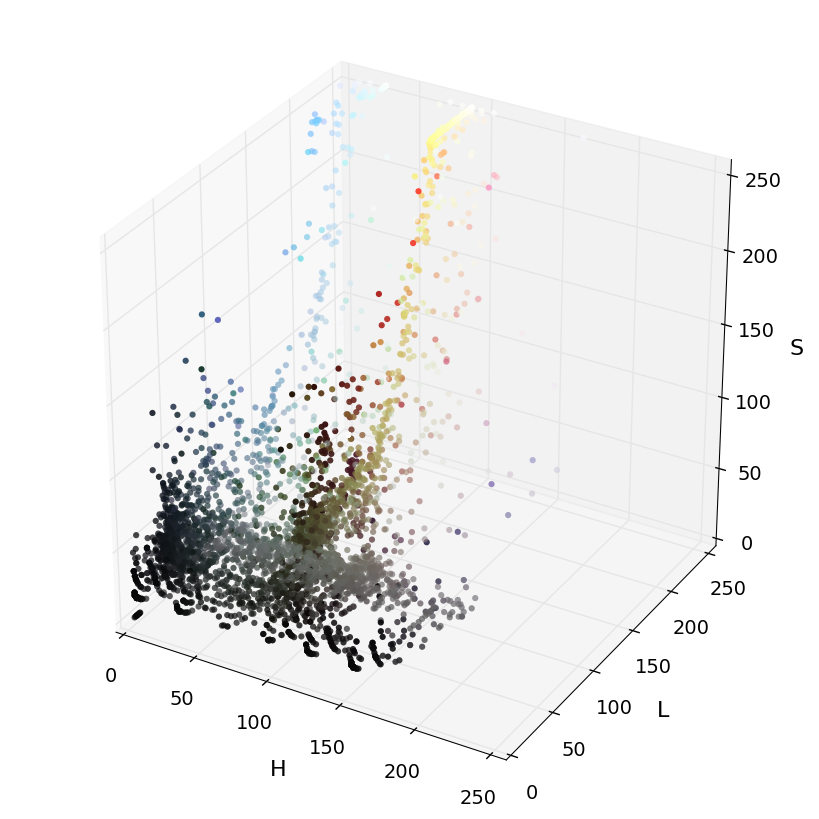

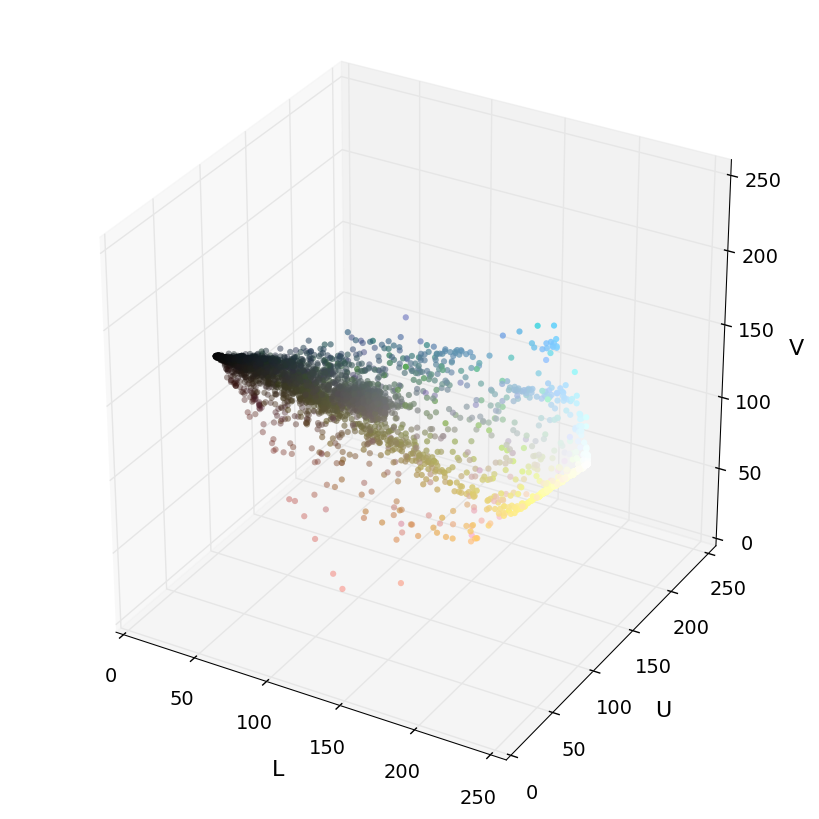

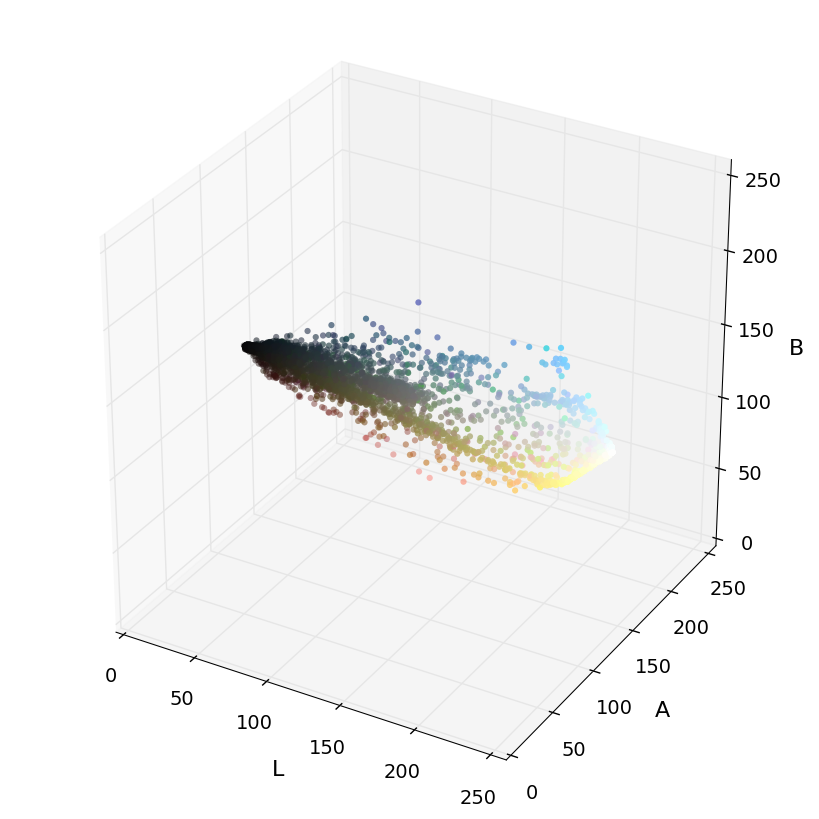

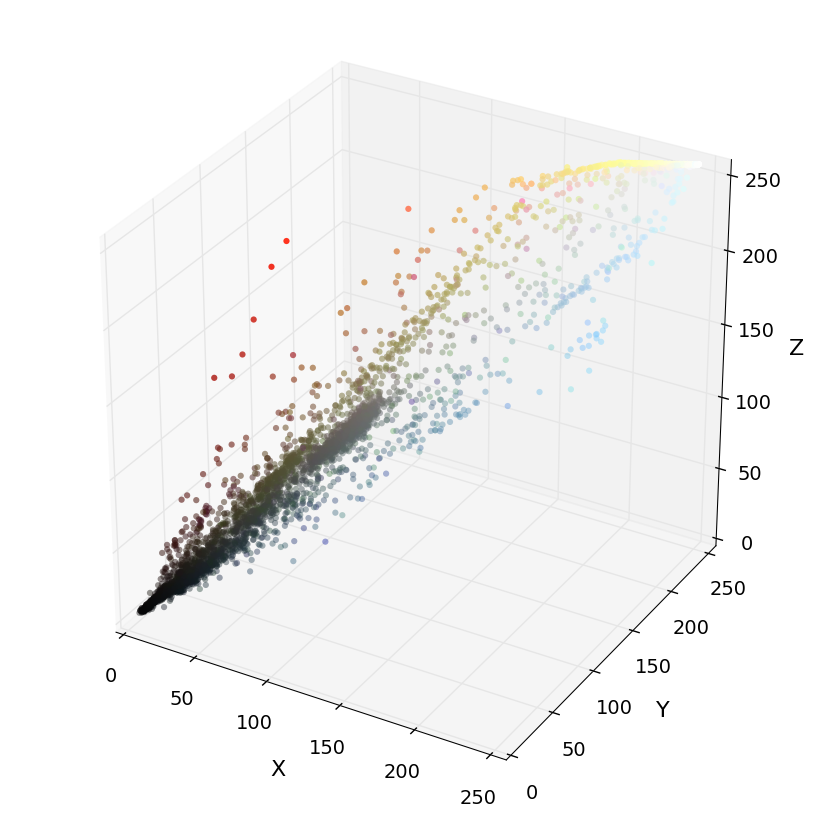

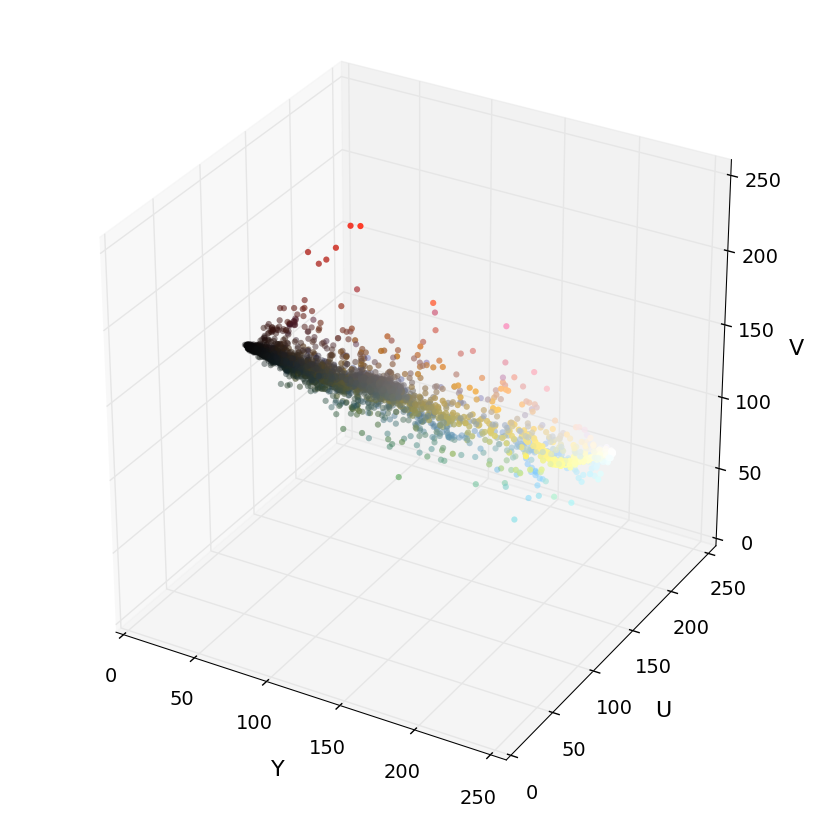

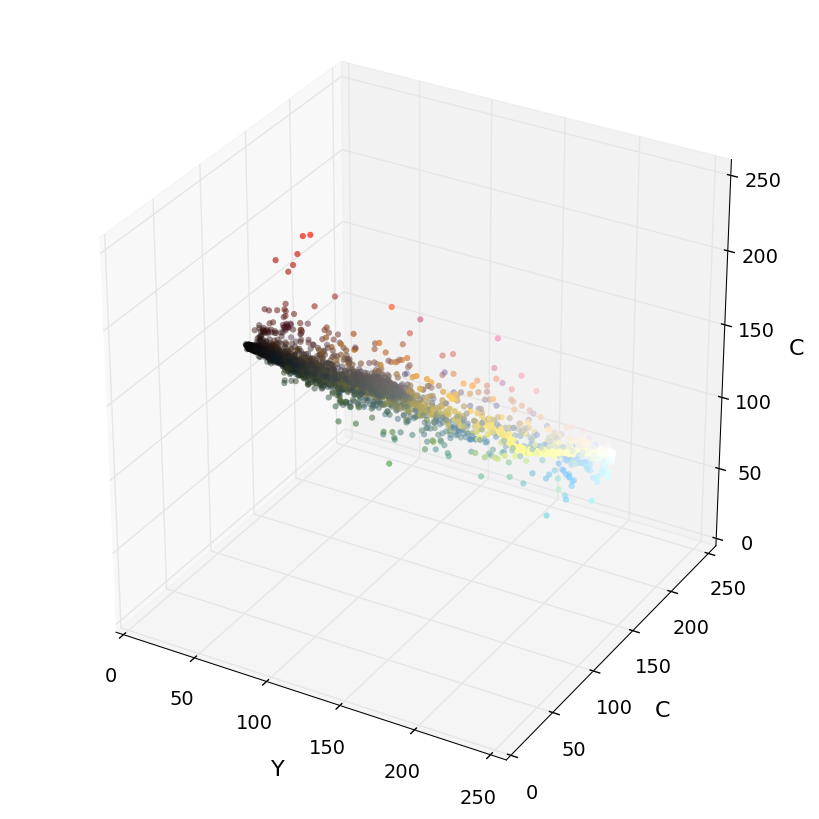

In [10]:
# Read a color image
# scene
#img = cv2.imread("test_images/000275.png")

#non-car image (2 ,3, 8 )
#img = cv2.imread('test_images/2.png') # in BGR

#car image (25, 31, 53)
img = cv2.imread('test_images/25.png') # in BGR

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
plt.imshow(rgb)

# Select a small fraction of pixels to plot by subsampling it
scale = max(rgb.shape[0], rgb.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(rgb, (np.int(rgb.shape[1] / scale), np.int(rgb.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)

scale = img_small / 255.  # scaled to [0, 1], only for plotting

rgb_plot = img_small
hsv_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
hls_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
luv_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
lab_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2LAB)
xyz_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2XYZ)
yuv_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2YUV)
ycc_plot = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)

# Plot and show
plot3d(rgb_plot, scale, axis_labels=list("RGB"))
plt.show()

plot3d(hsv_plot, scale, axis_labels=list("HSV"))
plt.show()

plot3d(hls_plot, scale, axis_labels=list("HLS"))
plt.show()

plot3d(luv_plot, scale, axis_labels=list("LUV"))
plt.show()

plot3d(lab_plot, scale, axis_labels=list("LAB"))
plt.show()

plot3d(xyz_plot, scale, axis_labels=list("XYZ"))
plt.show()

plot3d(yuv_plot, scale, axis_labels=list("YUV"))
plt.show()

plot3d(ycc_plot, scale, axis_labels=list("YCC"))
plt.show()

#### 2. Explain how you settled on your final choice of HOG parameters.

The ipython notebook examples above explored a large number of colorspace for cars and noncars using histograms for each channel and 3D plots for all colorspaces
I settled for the YUV colorspace, as

* Y channel represents a gray scale image and therefore the contrast, edges and contours very well
* color information in UV are quite different between car and non-car
* neatly seperable between classes (big distances of features)
* closely together in a single class, not spread widely

For the HOG parameter, very small numbers for bins and orientation were choosen, as 
* these gave very good classification result
* larger number did not seem to increase the performance / score much, but the computation time a lot

All features, colorspace, HOG, spatial, hist and direction were used

```
self.color_space='YUV'
        self.spatial_size=(32, 32) 
        self.hist_bins=32
        self.hist_range=(0, 256) 
        self.orient=9
        self.pix_per_cell=8
        self.cell_per_block=2
        self.hog_channel=0
        self.spatial_feat=True 
        self.hist_feat=True
        self.hog_feat=True
```

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

The code for this step is contained in the file `classifier.py`).  

It uses the functions from the helper scripts
```
from feature_helper import extract_features, single_img_features
from window_helper import slide_window
```

It contains the class:

```
class car_classifier:
    def __init__(self):
        #self.cars = []
        #self.notcars = []
        #self.X_train = []
        #self.X_test = []
        #self.y_train = []
        #self.y_test = []
    
        self.classifier = None
        self.X_scaler = None
        self.windows = []
                
        self.test_size=0.2
        
        self.color_space='YUV'
        self.spatial_size=(32, 32) 
        self.hist_bins=32
        self.hist_range=(0, 256) 
        self.orient=9
        self.pix_per_cell=8
        self.cell_per_block=2
        self.hog_channel=0
        self.spatial_feat=True 
        self.hist_feat=True
        self.hog_feat=True
        
        self.huge_x_start_stop=[None, None]
        self.huge_y_start_stop=[400, 720]
        self.huge_xy_window=(96, 96)
        self.huge_xy_overlap=[0.75, 0.75]
        
        self.large_x_start_stop=[None, None]
        self.large_y_start_stop=[400, 528]
        self.large_xy_window=(64, 64)
        self.large_xy_overlap=[0.6, 0.6]
        
        self.small_x_start_stop=[None, None]
        self.small_y_start_stop=[400, 528]
        self.small_xy_window=(48,48)
        self.small_xy_overlap=[0.5, 0.5]
```
which stores the parameters used by the pipeline (hardcoded), sliding window and feature extraction as well as the trained classifier itself, the feature scaler and the list of sliding windows (constant) to be searched.

It contains the functions:

```
def train_classifier(self)
```
which trains the classifier by:

* reading the training data
* create the feature vectors for both cars and notcars 
* create the scaler
* split training and test data sets
* train and test the classifier

Only the final classifier and scaler are stored, not the data, to reduce memory allocation of the class.

The function:

```
def create_search_windows(self, image)
                                     
```

creates a list of sliding windows that should be classified.

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

The code for this step is contained in the file `window_helper.py`.  

It contains the functions:

```
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None], 
                 xy_window=(64, 64), 
                 xy_overlap=(0.5, 0.5)):
```
that creates a list of sliding windows to be checked for an image

```
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
```

that draws bounding boxes given by a list bboxes of bounding boxes on an given image img:

The file `classifier.py` contains the `function create_search_windows()`

```
def create_search_windows(self, image)

 # slide huge windows across all area of interest (big vehicle appearence)
        windows_huge = slide_window(image, 
                                    x_start_stop=self.huge_x_start_stop, 
                                    y_start_stop=self.huge_y_start_stop, 
                                    xy_window=self.huge_xy_window, 
                                    xy_overlap=self.huge_xy_overlap)
                                    
        # slide large windows across upper part of road (large vehicle appearence)
        windows_large = slide_window(image, 
                                     x_start_stop=self.large_x_start_stop, 
                                     y_start_stop=self.large_y_start_stop, 
                                     xy_window=self.large_xy_window, 
                                     xy_overlap=self.large_xy_overlap)
        
        """
        # slide small windows across horizont (small vehicle appearence)
        windows_small = slide_window(image, 
                                     x_start_stop=self.small_x_start_stop, 
                                     y_start_stop=self.small_y_start_stop, 
                                     xy_window=self.small_xy_window, 
                                     xy_overlap=self.small_xy_overlap)
                                     
```
that creates a list of sliding windows that should be classified. (see above)s

Three different sizes of windows with different region of interests are used created, the final version uses the bigger two only (to reduce computational load).
By using bigger windows mainly and small windows only near the horizon, the total number of windows is significantly reduced. These size and area of the windows are mainly depending on the distance towards the cars, as the size of appearence of a car is usually smaller with distance.

The total speed of the algorithm depends mainly and heavily on the number of sliding windows used, varying from multiple frames per second to several seconds per frame!

The final result used aroud 1500 windows, resulting in approximately 1-2 seconds per frame (slooow...)

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

The pipeline programmed in `pipeline.py`.

It contains the class:

```
class Detect_pipeline:
    
    def __init__(self, tracked_frames_thresh = 1, cooling_factor = 1):
        
        self.tracked_frames_thresh = tracked_frames_thresh
        self.cooling_factor = cooling_factor
        
        self.current_frame = 0
        self.hot_windows = None
        self.initialized = False
        self.window_img = None
        self.heatmap = None
        self.labels = None
        self.bb_image = None
        self.thresh_heatmap = None
        
        # classifier object including trained svm and single image classifier
        self.car_finder = car_classifier()
```
 to include the classifier and process a single frame, bounding boxes and heatmap
 
 It contains the functions:
 
```
    def init_pipeline(self, image):
        
        # train the classifier
        self.car_finder.train_classifier()
        # create the sliding windows
        self.car_finder.create_search_windows(image)
        # create the heatmap
        self.create_heatmap(image)

```
to initialise Detect_pipeline class by training the classifier, screating the sliding windows and creating the heatmap

```
    def add_heat(self, heatmap, boxlist):
```
to increment heatmap with recent detections

```
    def reduce_heat(self, heatmap):
```
to slowly reduce heatmap when no detections

```
    def apply_threshold(self, heatmap, threshold):
```
to threshold the heatmap to suppress false detections

```
    def draw_labeled_bboxes(self, image):
```
to create the final result image by drawing bounding boxes according to labels of cars

```
    def find_windows(self, image):
        
```
to classify and draw bounding boxes on a single image

```
    def process_frame(self, image):
        
```

to process one single image using the whole pipeline
*  self.init_pipeline(image)
*  self.find_windows(image)
*  self.add_heat(self.heatmap, self.hot_windows)
*  self.reduce_heat(self.heatmap)
*  self.apply_threshold(self.heatmap, self.max_threshold, self.min_threshold)
* self.labels = label(self.heatmap)
* self.draw_labeled_bboxes(image)
* return self.bb_image

Here are example images showing the steps of the pipeline:

### Input image

![image1](./output_images/test_1261.jpg)

### All detected windows in a single frame

![image2](./output_images/window_img_1261.jpg)

### Heatmap

![image3](./output_images/heat_img_1261.jpg)

### Resulting Bounding boxes after labelling

![image4](./output_images/bb_img_1261.jpg)

### Pipeline execution

Here is the complete output and parameter for the test_video.mp4

It took around 1.7 seconds per frame processing 824 windows.
The SVM was trained using the small dataset with 2321 images only achieving 0.98 in about 0.5 seconds.

```
read in nb cars 1196
read in nb not_cars 1125
read in total 2321
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4932
0.48 Seconds to train SVC...
Test Accuracy of SVC =  0.9849
Image shape  720 1280 3
Number of total windows:  824
pipeline initialized =  True
Number of cars  2
Heatmap min  0.0
Heatmap max  5.0
[MoviePy] >>>> Building video videos/test_video_result.mp4
[MoviePy] Writing video videos/test_video_result.mp4
  3%|▎         | 1/39 [00:01<01:03,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  17.0
  5%|▌         | 2/39 [00:03<01:01,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  21.0
  8%|▊         | 3/39 [00:05<01:00,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  25.0
 10%|█         | 4/39 [00:06<00:58,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  29.0
 13%|█▎        | 5/39 [00:08<00:56,  1.65s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 15%|█▌        | 6/39 [00:09<00:54,  1.65s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 18%|█▊        | 7/39 [00:11<00:53,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 21%|██        | 8/39 [00:13<00:51,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 23%|██▎       | 9/39 [00:14<00:49,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 26%|██▌       | 10/39 [00:16<00:48,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 28%|██▊       | 11/39 [00:18<00:46,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 31%|███       | 12/39 [00:19<00:44,  1.65s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 33%|███▎      | 13/39 [00:21<00:43,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 36%|███▌      | 14/39 [00:23<00:41,  1.67s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 38%|███▊      | 15/39 [00:24<00:39,  1.66s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 41%|████      | 16/39 [00:26<00:37,  1.65s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 44%|████▎     | 17/39 [00:28<00:36,  1.65s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 46%|████▌     | 18/39 [00:29<00:34,  1.64s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 49%|████▊     | 19/39 [00:31<00:32,  1.64s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 51%|█████▏    | 20/39 [00:33<00:35,  1.87s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 54%|█████▍    | 21/39 [00:35<00:34,  1.93s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 56%|█████▋    | 22/39 [00:37<00:31,  1.84s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 59%|█████▉    | 23/39 [00:39<00:30,  1.91s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 62%|██████▏   | 24/39 [00:41<00:29,  2.00s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 64%|██████▍   | 25/39 [00:43<00:26,  1.93s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 67%|██████▋   | 26/39 [00:45<00:23,  1.84s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 69%|██████▉   | 27/39 [00:47<00:22,  1.84s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 72%|███████▏  | 28/39 [00:48<00:20,  1.83s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 74%|███████▍  | 29/39 [00:50<00:18,  1.83s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 77%|███████▋  | 30/39 [00:52<00:16,  1.86s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 79%|███████▉  | 31/39 [00:54<00:14,  1.80s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 82%|████████▏ | 32/39 [00:56<00:12,  1.77s/it]Number of cars  3
Heatmap min  0.0
Heatmap max  30.0
 85%|████████▍ | 33/39 [00:57<00:10,  1.77s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 87%|████████▋ | 34/39 [00:59<00:09,  1.90s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 90%|████████▉ | 35/39 [01:01<00:07,  1.89s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 92%|█████████▏| 36/39 [01:03<00:05,  1.87s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 95%|█████████▍| 37/39 [01:05<00:03,  1.92s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0
 97%|█████████▋| 38/39 [01:07<00:01,  1.91s/it]Number of cars  2
Heatmap min  0.0
Heatmap max  30.0

[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/test_video_result.mp4 
    
```

---

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)

The pipeline decribed above is called by the video stream processing in Video_Car_Detector.py
The video result is included in the video folder.

Ultimately I searched on three scales using YUV-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a really nice result.  The only drawback is the extremely slow algorithm by searching around 2500 windows resulting in multiple seconds per frame.

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video by incrementing the count in the heatmap.  From the positive detections I created a heatmap and then thresholded by at least 5 detections that map to identify vehicle positions. I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected by using cv2.rectangle with the labels.

To account for accumulated false detections and moving cars, a cooling of the heatmap is necessary.
Each frame all counts in the heatmap get reduced by a cooling factor = 1 to faded out previous detections over time and allow moving and tracking of vehicles.

Also the heatmap is thresholded to a maximum value of max_thresh = 25 to allow cooling in a reasonable time (max 1s without detection), otherwise vehicles that are present for along time would cause really high values, which would not be cooled soon after the car is gone.

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

The videos are stored in the video folder.

### Resulting Test Video

In [6]:
import io
import base64
from IPython.display import HTML

video = io.open('./videos/test_video_result.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<video alt="test_video_result" controls> <source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

The classifier itself and the pipeline are working really good and accurate.

The algorithm is really slow, because a lot of overlapping windows in different sizes are used. The result is really nice. The parameter should be fine tuned and the number of windows should significantly reduced.

Also the linear SVM could be replaced by a:

* faster algorithm that would allow higher number of boxes in faster time
* or better algorithm that would allow lower number of boxes due to less false positives

The heatmap approach needs a lot of boxes to be able to differentiate between positives and false positives.

A better algorithm would be to check the detection for sanity over several frames for examples
* using a tracking algorithm
* calculate the speed of a car
* real cars should move approximately with the same speed as the own vehicle
* check position and size of appearance for sanity
* tracking using a motion model and a kalman filter

The algorithm will likely fail, if cars are occluded, on the opposite lane or closely together, which would lead to big bounding boxes, not seperating the number and position of the cars.

